Data Exploration - Customer Clustering

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Setting to show all columns on output
pd.set_option('display.max_columns', 999)

In [70]:
# loading the dataset
df = pd.read_csv("../data/imaginary_customers.csv")
print(df.head(6))

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   
5           6  Female   22              58000                      76   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  
5         Artist                0            2  


In [71]:
# check for data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


In [72]:
# look at descriptive statistics
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


In [73]:
# check missing profession values
df[df['Profession'].isna()].head(100)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [74]:
# drop missing profession rows and CustomerID column
df = df.dropna(subset=["Profession"]).drop("CustomerID", axis=1)
#print(df.info())
print(df["Profession"].unique())

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']


In [75]:
# encode object columns (drop first to avoid dummy variable trap)
df = pd.get_dummies(df, columns=["Gender", "Profession"], drop_first=True)
df = df.astype(int)
print(df.head(6))

   Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0   19              15000                      39                1   
1   21              35000                      81                3   
2   20              86000                       6                1   
3   23              59000                      77                0   
4   31              38000                      40                2   
5   22              58000                      76                0   

   Family Size  Gender_Male  Profession_Doctor  Profession_Engineer  \
0            4            1                  0                    0   
1            3            1                  0                    1   
2            1            0                  0                    1   
3            2            0                  0                    0   
4            6            0                  0                    0   
5            2            0                  0                    0   

   Professi

In [76]:
# standardize numerical columns
scaler = StandardScaler()
int_columns = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]
df[int_columns] = scaler.fit_transform(df[int_columns])

In [77]:
print(df.head())
print(df.columns)

        Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0 -1.052345          -2.086675               -0.431850        -0.787837   
1 -0.981941          -1.650205                1.069755        -0.278342   
2 -1.017143          -0.537207               -1.611684        -0.787837   
3 -0.911538          -1.126441                0.926745        -1.042584   
4 -0.629924          -1.584734               -0.396098        -0.533089   

   Family Size  Gender_Male  Profession_Doctor  Profession_Engineer  \
0     0.123358            1                  0                    0   
1    -0.384815            1                  0                    1   
2    -1.401161            0                  0                    1   
3    -0.892988            0                  0                    0   
4     1.139704            0                  0                    0   

   Profession_Entertainment  Profession_Executive  Profession_Healthcare  \
0                         0                   

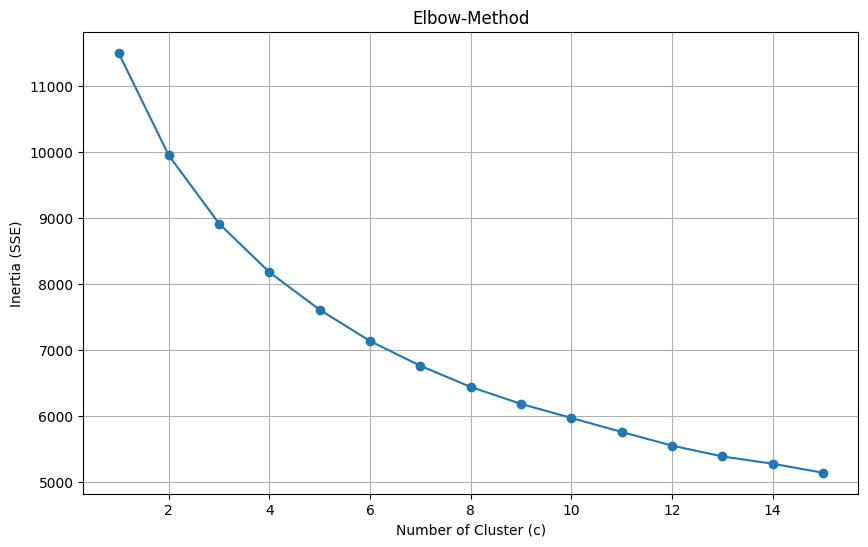

In [78]:
# test 15 different cluster sizes (elbow method)
inertia = []
cluster_sizes = range(1, 16)

for c in cluster_sizes:
    kmeans = KMeans(n_clusters=c, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# visualize the elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_sizes, inertia, marker='o')
plt.title("Elbow-Method")
plt.xlabel("Number of Cluster (c)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

In [79]:
# test for 4 and 5 clusters
df_copy_4 = df.copy() 
c4 = 4
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_copy_4['Cluster'] = kmeans4.fit_predict(df_copy_4)

df_copy_5 = df.copy() 
c5 = 5
kmeans5 = KMeans(n_clusters=c5, random_state=42, n_init=10)
df_copy_5['Cluster'] = kmeans5.fit_predict(df_copy_5)

In [80]:
# look at cluster centers for 4 clusters and calculate silhouette score
df_copy_4.groupby("Cluster").mean(numeric_only=True)


,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Cluster,,,,,,,,,,,,,,
0,0.108308,0.305832,-0.065881,-0.261359,1.217140,0.407619,0.083810,0.085714,0.123810,0.091429,0.186667,0.028571,0.076190,0.041905
1,-0.024115,0.397743,0.036601,1.315775,-0.216164,0.427948,0.087336,0.091703,0.102620,0.078603,0.150655,0.056769,0.065502,0.043668
2,-0.202980,-0.211155,0.935224,-0.551717,-0.541485,0.403162,0.081028,0.084980,0.130435,0.079051,0.173913,0.019763,0.055336,0.041502
3,0.119519,-0.495554,-0.956721,-0.391266,-0.558832,0.388655,0.075630,0.102941,0.117647,0.060924,0.176471,0.018908,0.092437,0.046218


In [81]:
# calculate silhouette score for 4 clusters
sil_score_4 = silhouette_score(df_copy_4, df_copy_4['Cluster'])
print(f"Silhouette Score for 4 Cluster: {sil_score_4}")

Silhouette Score for 4 Cluster: 0.19897355184563287


In [82]:
# look at cluster centers for 5 clusters
df_copy_5.groupby("Cluster").mean(numeric_only=True)

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Cluster,,,,,,,,,,,,,,
0,0.065241,0.141429,-0.360820,1.327849,-0.543872,0.456233,0.092838,0.100796,0.103448,0.095491,0.167109,0.055703,0.063660,0.045093
1,-0.704889,0.533375,-0.114710,0.089068,1.174059,0.383099,0.078873,0.087324,0.118310,0.087324,0.205634,0.039437,0.076056,0.042254
2,0.058206,-0.509147,-0.961959,-0.643165,-0.480176,0.362963,0.083951,0.088889,0.116049,0.059259,0.160494,0.017284,0.098765,0.044444
3,-0.686441,-0.333815,0.955132,-0.369232,-0.567400,0.437186,0.082915,0.082915,0.087940,0.085427,0.170854,0.022613,0.062814,0.042714
4,1.105278,0.224176,0.433028,-0.290191,0.484988,0.395349,0.072093,0.095349,0.165116,0.065116,0.162791,0.020930,0.060465,0.041860


In [83]:
# calculate silhouette score for 5 clusters
sil_score_5 = silhouette_score(df_copy_5, df_copy_5['Cluster'])
print(f"Silhouette Score for 5 Cluster: {sil_score_5}")

Silhouette Score for 5 Cluster: 0.2169663876203812
